In [1]:
# =========================
# 0) 导入库与设置
# =========================
import pandas as pd
import numpy as np
from IPython.display import display  


# 设置显示选项，防止结果被折叠
pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 140)

# =========================
# 1) 读取数据
# =========================
path = "weatherAUS.csv"  # 确保文件在当前目录下
try:
    df = pd.read_csv(path)
    print(f"成功读取文件: {path}")
except FileNotFoundError:
    print(f"错误: 找不到文件 {path}，请检查路径。")
    df = pd.DataFrame() # 创建空DataFrame防止后面报错

# 只有当成功读取数据后才执行后续分析
if not df.empty:
    # =========================
    # 2) 基本信息概览
    # =========================
    print(f"\nShape (行数, 列数): {df.shape}")
    print(f"Columns: {df.columns.tolist()}")
    
    print("\n字段类型 (Dtypes):")
    display(df.dtypes.to_frame("dtype").T)

    print("\n基本信息 (Info):")
    df.info()

    print("\n数据预览 (前5行 & 后5行):")
    display(df.head(5))
    display(df.tail(5))

    # =========================
    # 3) 缺失值检查
    # =========================
    na_cnt = df.isna().sum()
    na_pct = (na_cnt / len(df) * 100).round(2)
    
    missing = (
        pd.DataFrame({"missing_cnt": na_cnt, "missing_pct": na_pct})
        .sort_values("missing_cnt", ascending=False)
    )
    # 只显示有缺失值的列
    print("\n缺失值统计 (Top 30):")
    display(missing[missing["missing_cnt"] > 0].head(30))

    # =========================
    # 4) 重复行检查
    # =========================
    dup_rows = df.duplicated().sum()
    print(f"\n完全重复的行数: {dup_rows}")

    # =========================
    # 5) 目标列分布 (RainTomorrow)
    # =========================
    target_col = "RainTomorrow"
    if target_col in df.columns:
        print(f"\n目标列 '{target_col}' 分布:")
        display(df[target_col].value_counts(dropna=False))
        
        # 计算 Yes 的比例
        s = df[target_col].dropna()
        if s.dtype == "object":
            rate_yes = (s == "Yes").mean()
        else:
            # 如果已经是0/1格式
            rate_yes = s.mean()
        
        print(f"RainTomorrow='Yes' 占比: {rate_yes:.4f} ({rate_yes*100:.2f}%)")
    else:
        print(f"\n未找到目标列: {target_col}")

    # =========================
    # 6) 数值与分类列划分
    # =========================
    cat_cols = df.select_dtypes(include=["object"]).columns.tolist()
    num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

    print(f"\n数值型列数: {len(num_cols)}")
    print(f"分类型列数: {len(cat_cols)}")

    # =========================
    # 7) 分类列基数检查 (Unique Values)
    # =========================
    if cat_cols:
        nunique_cat = df[cat_cols].nunique(dropna=True).sort_values(ascending=False)
        print("\n分类列的唯一值数量 (Top 20):")
        display(nunique_cat.head(20))

    # =========================
    # 8) 数值列描述统计
    # =========================
    if num_cols:
        print("\n数值列统计描述 (Describe):")
        display(df[num_cols].describe().T)

        # 极端值快速检查 (1%, 50%, 99% 分位数)
        q = df[num_cols].quantile([0.01, 0.5, 0.99]).T
        q.columns = ["q01", "q50", "q99"]
        print("\n数值列分位数 (1%, 50%, 99%):")
        display(q.sort_values("q99", ascending=False).head(30))
else:
    print("DataFrame 为空，无法进行分析。")

成功读取文件: weatherAUS.csv

Shape (行数, 列数): (145460, 23)
Columns: ['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']

字段类型 (Dtypes):


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
dtype,object,object,float64,float64,float64,float64,float64,object,float64,object,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,object



基本信息 (Info):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,ESE,17.0,17.0,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN



缺失值统计 (Top 30):


,missing_cnt,missing_pct
Sunshine,69835,48.01
Evaporation,62790,43.17
Cloud3pm,59358,40.81
Cloud9am,55888,38.42
Pressure9am,15065,10.36
Pressure3pm,15028,10.33
WindDir9am,10566,7.26
WindGustDir,10326,7.10
WindGustSpeed,10263,7.06
Humidity3pm,4507,3.10



完全重复的行数: 0

目标列 'RainTomorrow' 分布:


RainTomorrow
No     110316
Yes     31877
NaN      3267
Name: count, dtype: int64

RainTomorrow='Yes' 占比: 0.2242 (22.42%)

数值型列数: 16
分类型列数: 7

分类列的唯一值数量 (Top 20):


Date            3436
Location          49
WindGustDir       16
WindDir9am        16
WindDir3pm        16
RainToday          2
RainTomorrow       2
dtype: int64


数值列统计描述 (Describe):


,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0



数值列分位数 (1%, 50%, 99%):


,q01,q50,q99
Pressure9am,1000.2,1017.6,1034.0
Pressure3pm,998.5,1015.2,1031.6
Humidity9am,18.0,70.0,100.0
Humidity3pm,9.0,52.0,98.0
WindGustSpeed,15.0,39.0,81.0
WindSpeed3pm,2.0,19.0,43.0
MaxTemp,9.0,22.6,40.1
WindSpeed9am,0.0,13.0,39.0
Temp3pm,7.6,21.1,38.5
Rainfall,0.0,0.0,37.4


In [2]:
import pandas as pd
import numpy as np
import os

# =========================
# 1. 读取数据
# =========================
filename = "weatherAUS.csv"
if os.path.exists(filename):
    df = pd.read_csv(filename)
    print(f"原始数据集形状: {df.shape}")
else:
    print(f"错误: 找不到文件 {filename}")
    # 停止执行后续代码（在Notebook中可以手动停止，这里为了演示逻辑）
    df = pd.DataFrame()

if not df.empty:
    # =========================
    # 2. 关键步骤：按日期排序
    # =========================
    # 确保 Date 列是 datetime 类型
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'])
        # 按时间排序（这是时间序列数据划分的核心！）
        df = df.sort_values('Date').reset_index(drop=True)
        print("已按日期排序完成。")
    else:
        print("警告: 没有找到 'Date' 列，将保持原始顺序。")

    # =========================
    # 3. 手动切分 (前80%训练，后20%测试)
    # =========================
    split_ratio = 0.8
    split_index = int(len(df) * split_ratio)

    # 切分
    train_df = df.iloc[:split_index].copy()
    test_df = df.iloc[split_index:].copy()

    # =========================
    # 4. 验证切分结果
    # =========================
    print(f"\n切分点索引: {split_index}")
    print(f"训练集形状: {train_df.shape} ({len(train_df)/len(df):.1%})")
    print(f"测试集形状: {test_df.shape} ({len(test_df)/len(df):.1%})")

    # 检查时间是否有重叠（确保训练集都在测试集之前）
    if 'Date' in df.columns:
        print(f"\n训练集时间范围: {train_df['Date'].min().date()} -> {train_df['Date'].max().date()}")
        print(f"测试集时间范围: {test_df['Date'].min().date()} -> {test_df['Date'].max().date()}")

    # =========================
    # 5. 保存文件
    # =========================
    train_df.to_csv("weather_train.csv", index=False)
    test_df.to_csv("weather_test.csv", index=False)
    print("\n已保存文件:")
    print(" -> weather_train.csv")
    print(" -> weather_test.csv")

原始数据集形状: (145460, 23)
已按日期排序完成。

切分点索引: 116368
训练集形状: (116368, 23) (80.0%)
测试集形状: (29092, 23) (20.0%)

训练集时间范围: 2007-11-01 -> 2015-11-10
测试集时间范围: 2015-11-10 -> 2017-06-25

已保存文件:
 -> weather_train.csv
 -> weather_test.csv


In [4]:
%pip install lightautoml pandas numpy scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
# 安装 ydata-profiling
!pip install ydata-profiling

# 顺便把后面要用的 category_encoders 也一起装了，省得下次报错
!pip install category_encoders

   ---------------------------------------- 0.0/3.1 MB ? eta -:--:--
   --- ------------------------------------ 0.3/3.1 MB ? eta -:--:--
   ------ --------------------------------- 0.5/3.1 MB 1.2 MB/s eta 0:00:03
   ------------- -------------------------- 1.0/3.1 MB 1.7 MB/s eta 0:00:02
   -------------------- ------------------- 1.6/3.1 MB 1.9 MB/s eta 0:00:01
   -------------------------- ------------- 2.1/3.1 MB 2.0 MB/s eta 0:00:01
   --------------------------------- ------ 2.6/3.1 MB 2.2 MB/s eta 0:00:01
   ---------------------------------------- 3.1/3.1 MB 2.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ------- -------------------------------- 0.5/2.6 MB 3.4 MB/s eta 0:00:01
   ------------------- -------------------- 1.3/2.6 MB 3.2 MB/s eta 0:00:01
   --------------------------- ------------ 1.8/2.6 MB 3.1 MB/s eta 0:00:01
   ---------------------------------------- 2.6/2.6 MB 3.2 MB/s eta 0:00:00
   ------------------------------

In [3]:
import pandas as pd
from ydata_profiling import ProfileReport
import os

# ==========================================
# 1. 读取数据
# ==========================================
# 确保文件名和你保存的一致
train_df = pd.read_csv("weather_train.csv")
test_df = pd.read_csv("weather_test.csv")

print(f"成功加载训练集: {train_df.shape}")
print(f"成功加载测试集: {test_df.shape}")

# ==========================================
# 2. 生成 训练集 (Train) 报告 - 【重点分析对象】
# ==========================================
# 注意：我们在报告中明确指定 target_col，这样报告会自动计算特征与目标的相关性
print("正在生成训练集报告，可能需要几分钟，请耐心等待...")

profile_train = ProfileReport(
    train_df, 
    title="WeatherAUS 训练集数据质量报告", 
    explorative=True
)

# 保存报告到当前目录
profile_train.to_file("report_train.html")
print("✅ 训练集报告已生成: report_train.html")

# ==========================================
# 3. 生成 测试集 (Test) 报告 - 【辅助参考】
# ==========================================
print("正在生成测试集报告...")

profile_test = ProfileReport(
    test_df, 
    title="WeatherAUS 测试集数据质量报告", 
    explorative=True
)

profile_test.to_file("report_test.html")
print("✅ 测试集报告已生成: report_test.html")

print("\n请在左侧文件浏览器中找到这两个 .html 文件，右键下载或双击打开查看。")

d:\Program Files\anaconda3\envs\ind-env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


成功加载训练集: (116368, 23)
成功加载测试集: (29092, 23)
正在生成训练集报告，可能需要几分钟，请耐心等待...


Export report to file: 100%|██████████| 1/1 [00:00<00:00, 29.67it/s]


✅ 训练集报告已生成: report_train.html
正在生成测试集报告...


Export report to file: 100%|██████████| 1/1 [00:00<00:00, 15.10it/s]

✅ 测试集报告已生成: report_test.html

请在左侧文件浏览器中找到这两个 .html 文件，右键下载或双击打开查看。


In [4]:
import pandas as pd
import numpy as np

# 1. 读取数据
train_df = pd.read_csv("weather_train.csv")
test_df = pd.read_csv("weather_test.csv")

print("原始训练集形状:", train_df.shape)

# ==========================================
# 3.1 处理目标变量 (RainTomorrow)
# ==========================================
# 删除目标变量缺失的行
train_df = train_df.dropna(subset=['RainTomorrow'])
test_df = test_df.dropna(subset=['RainTomorrow'])

# 将目标变量转换为数字 (Yes=1, No=0)
mapping = {'Yes': 1, 'No': 0}
train_df['RainTomorrow'] = train_df['RainTomorrow'].map(mapping)
test_df['RainTomorrow'] = test_df['RainTomorrow'].map(mapping)

print(f"删除目标缺失后训练集形状: {train_df.shape}")

# ==========================================
# 3.2 删除高缺失率的列 & 作弊列
# ==========================================
# 设定阈值：缺失率超过 40% 的列将被删除
missing_threshold = 0.40
train_missing = train_df.isnull().mean()
cols_to_drop = train_missing[train_missing > missing_threshold].index.tolist()

# 检查是否存在 RISK_MM (作弊列) 并添加到删除列表
if 'RISK_MM' in train_df.columns:
    cols_to_drop.append('RISK_MM')

print(f"即将删除的列 (缺失过高或作弊): {cols_to_drop}")

train_df = train_df.drop(columns=cols_to_drop)
test_df = test_df.drop(columns=cols_to_drop, errors='ignore') # 测试集对应删除

# ==========================================
# 3.3 特征工程：处理日期 (Date)
# ==========================================
# 我们不需要具体的日期，但月份对天气很重要
train_df['Date'] = pd.to_datetime(train_df['Date'])
test_df['Date'] = pd.to_datetime(test_df['Date'])

# 提取月份
train_df['Month'] = train_df['Date'].dt.month
test_df['Month'] = test_df['Date'].dt.month

# 删除原始 Date 列
train_df = train_df.drop(columns=['Date'])
test_df = test_df.drop(columns=['Date'])

# ==========================================
# 3.4 填补剩余缺失值 (Imputation)
# ==========================================
# 定义数值列和类别列
numeric_cols = train_df.select_dtypes(include=[np.number]).columns
categorical_cols = train_df.select_dtypes(include=['object']).columns

# 注意：要在目标变量中排除 RainTomorrow (因为它已经是数值型了，但在上面我们已经把它转为0/1了，所以它会在numeric_cols里)
# 我们需要把它从 numeric_cols 中暂时拿出来，不进行填补（其实已经没缺失了）
feature_numeric_cols = [c for c in numeric_cols if c != 'RainTomorrow']

print("正在填补缺失值...")

# A. 数值特征：用【中位数】填补
for col in feature_numeric_cols:
    median_val = train_df[col].median()
    train_df[col] = train_df[col].fillna(median_val)
    test_df[col] = test_df[col].fillna(median_val) # 注意：测试集必须用训练集的中位数填补！

# B. 类别特征：用【众数】(出现最多的值) 填补
for col in categorical_cols:
    mode_val = train_df[col].mode()[0]
    train_df[col] = train_df[col].fillna(mode_val)
    test_df[col] = test_df[col].fillna(mode_val)

# ==========================================
# 3.5 最终检查与保存
# ==========================================
print("-" * 30)
print("预处理完成！")
print(f"最终训练集形状: {train_df.shape}")
print(f"最终测试集形状: {test_df.shape}")
print(f"剩余缺失值总数: {train_df.isnull().sum().sum()}") # 应该是 0

# 保存清洗后的数据，供下一步编码使用
train_df.to_csv("train_cleaned.csv", index=False)
test_df.to_csv("test_cleaned.csv", index=False)

原始训练集形状: (116368, 23)
删除目标缺失后训练集形状: (113760, 23)
即将删除的列 (缺失过高或作弊): ['Sunshine']
正在填补缺失值...
------------------------------
预处理完成！
最终训练集形状: (113760, 22)
最终测试集形状: (28433, 22)
剩余缺失值总数: 0


In [5]:
import pandas as pd
import category_encoders as ce

# 1. 读取刚才清洗好的数据
train_df = pd.read_csv("train_cleaned.csv")
test_df = pd.read_csv("test_cleaned.csv")

# 2. 准备数据：分离特征 (X) 和目标 (y)
# 我们的目标变量是 'RainTomorrow'
target_col = 'RainTomorrow'

X_train = train_df.drop(columns=[target_col])
y_train = train_df[target_col]

X_test = test_df.drop(columns=[target_col])
y_test = test_df[target_col]

# 3. 自动识别需要编码的类别列 (Object类型)
# 注意：我们之前已经把Month变成了数字，所以它不会被编码，这很好
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()

print(f"需要编码的类别特征 ({len(categorical_cols)}个): {categorical_cols}")

# ==========================================
# 方案 A: WoE 编码 (Weight of Evidence)
# ==========================================
print("\n正在进行 WoE 编码...")
woe_encoder = ce.WOEEncoder(cols=categorical_cols)

# 重要：只在【训练集】上拟合(fit)，然后转换(transform)训练集和测试集
# 这样可以防止“数据泄露”
X_train_woe = woe_encoder.fit_transform(X_train, y_train)
X_test_woe = woe_encoder.transform(X_test)

# 把目标变量拼回去，保存文件
train_woe = pd.concat([X_train_woe, y_train], axis=1)
test_woe = pd.concat([X_test_woe, y_test], axis=1)

train_woe.to_csv("train_woe.csv", index=False)
test_woe.to_csv("test_woe.csv", index=False)
print("✅ WoE 编码完成，已保存: train_woe.csv, test_woe.csv")

# ==========================================
# 方案 B: Target Encoding (目标编码)
# ==========================================
print("\n正在进行 Target Encoding...")
# Target Encoding 也是利用目标变量的均值来替换类别
te_encoder = ce.TargetEncoder(cols=categorical_cols)

X_train_te = te_encoder.fit_transform(X_train, y_train)
X_test_te = te_encoder.transform(X_test)

# 把目标变量拼回去，保存文件
train_te = pd.concat([X_train_te, y_train], axis=1)
test_te = pd.concat([X_test_te, y_test], axis=1)

train_te.to_csv("train_te.csv", index=False)
test_te.to_csv("test_te.csv", index=False)
print("✅ Target Encoding 完成，已保存: train_te.csv, test_te.csv")

# ==========================================
# 验证一下
# ==========================================
print("-" * 30)
print("验证编码结果 (打印前5行数据示例):")
print("WoE编码后的 Location 列:")
print(X_train_woe['Location'].head())
print("\n注意：现在所有特征都应该是数字了！")

需要编码的类别特征 (5个): ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

正在进行 WoE 编码...
✅ WoE 编码完成，已保存: train_woe.csv, test_woe.csv

正在进行 Target Encoding...
✅ Target Encoding 完成，已保存: train_te.csv, test_te.csv
------------------------------
验证编码结果 (打印前5行数据示例):
WoE编码后的 Location 列:
0   -0.267385
1   -0.267385
2   -0.267385
3   -0.267385
4   -0.267385
Name: Location, dtype: float64

注意：现在所有特征都应该是数字了！


正在加载数据...

1. 训练 Logistic Regression...
   -> 正在计算 Logistic Regression 的置信区间...

2. 训练 Random Forest...
   -> 正在计算 Random Forest 的置信区间...

3. 训练 XGBoost...


d:\Program Files\anaconda3\envs\ind-env\lib\site-packages\xgboost\core.py:158: UserWarning: [20:26:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


   -> 正在计算 XGBoost 的置信区间...

4. 训练 LightAutoML (这可能需要几分钟)...
[20:26:50] Stdout logging level is INFO.
[20:26:50] Task: binary

[20:26:50] Start automl preset with listed constraints:
[20:26:50] - time: 240.00 seconds
[20:26:50] - CPU: 32 cores
[20:26:50] - memory: 16 GB

[20:26:50] Train data shape: (113760, 22)

[20:26:52] Layer 1 train process start. Time left 237.83 secs
[20:26:54] Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...
[20:27:05] Time limit exceeded after calculating fold 3

[20:27:05] Fitting Lvl_0_Pipe_0_Mod_0_LinearL2 finished. score = 0.8706175291404306
[20:27:05] Lvl_0_Pipe_0_Mod_0_LinearL2 fitting and predicting completed
[20:27:05] Time left 224.57 secs

[20:27:37] Selector_LightGBM fitting and predicting completed
[20:27:37] Start fitting Lvl_0_Pipe_1_Mod_0_LightGBM ...
[20:27:56] Time limit exceeded after calculating fold 0

[20:27:56] Fitting Lvl_0_Pipe_1_Mod_0_LightGBM finished. score = 0.8849716492118258
[20:27:56] Lvl_0_Pipe_1_Mod_0_LightGBM fitting and predicti

Optimization Progress:   1%|          | 1/101 [00:12<20:11, 12.12s/it, best_trial=0, best_value=0.879]

[20:28:50] Hyperparameters optimization for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost completed
[20:28:50] Start fitting Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost ...


[20:30:24] Time limit exceeded after calculating fold 3

[20:30:24] Fitting Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost finished. score = 0.8808762744602837
[20:30:24] Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost fitting and predicting completed
[20:30:24] Time left 25.91 secs

[20:30:24] Time limit exceeded in one of the tasks. AutoML will blend level 1 models.

[20:30:24] Layer 1 training completed.

[20:30:24] Blending: optimization starts with equal weights. Score = 0.8829231
[20:30:24] Blending: iteration 0: score = 0.8836231, weights = [0.08635765 0.51585907 0.19889165 0.19889165]
[20:30:25] Blending: iteration 1: score = 0.8836234, weights = [0.08725767 0.5142943  0.20298621 0.19546182]
[20:30:25] Blending: no improvements for score. Terminated.

[20:30:25] Blending: best score = 0.8836234, best weights = [0.08725767 0.5142943  0.20298621 0.19546182]
[20:30:25] Automl preset training completed in 215.61 seconds

[20:30:25] Model description:
Final prediction for new objects (level 0) = 
	 0.08726 * 

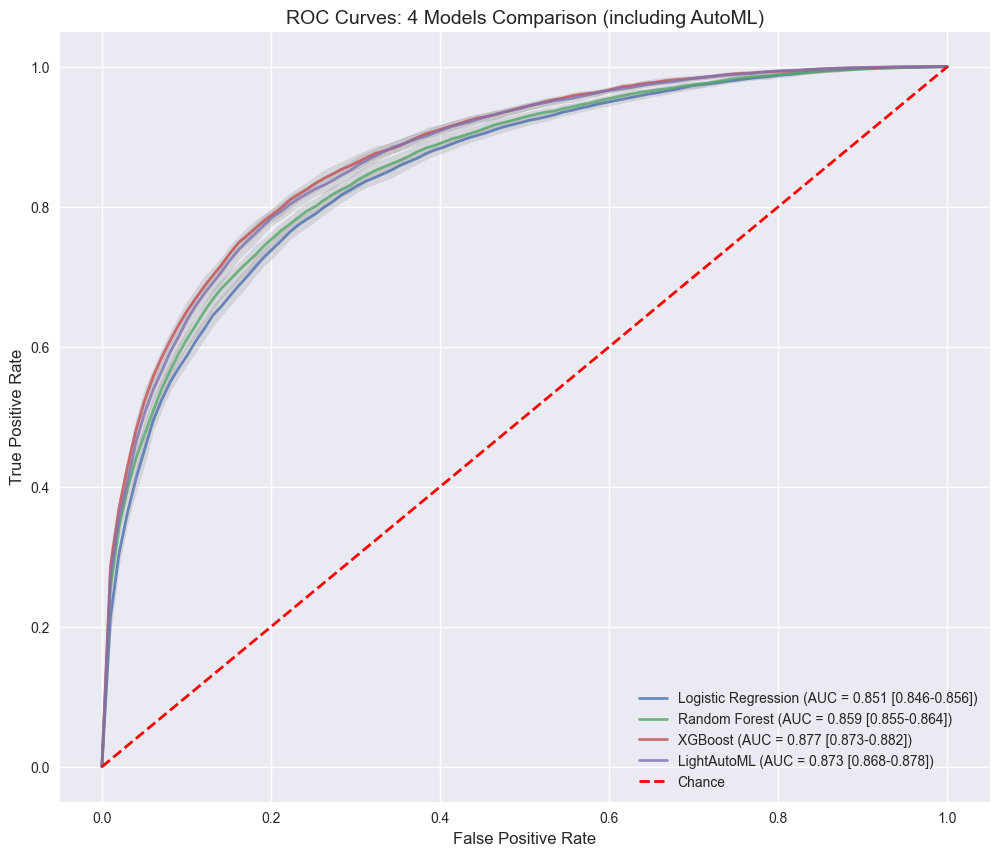

In [9]:
# ==========================================
# 0. 魔法命令与导入
# ==========================================
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.utils import resample
from lightautoml.automl.presets.tabular_presets import TabularAutoML
from lightautoml.tasks import Task

# 设置绘图风格
plt.style.use('seaborn-v0_8')

# ==========================================
# 1. 准备数据
# ==========================================
print("正在加载数据...")

# A. 逻辑回归专用数据 (WoE)
train_woe = pd.read_csv("train_woe.csv")
test_woe = pd.read_csv("test_woe.csv")
X_train_lr = train_woe.drop(columns=['RainTomorrow'])
y_train_lr = train_woe['RainTomorrow']
X_test_lr = test_woe.drop(columns=['RainTomorrow'])
y_test_lr = test_woe['RainTomorrow']

# B. 树模型专用数据 (Target Encoding)
train_te = pd.read_csv("train_te.csv")
test_te = pd.read_csv("test_te.csv")
X_train_tree = train_te.drop(columns=['RainTomorrow'])
y_train_tree = train_te['RainTomorrow']
X_test_tree = test_te.drop(columns=['RainTomorrow'])
y_test_tree = test_te['RainTomorrow']

# C. LightAutoML 专用数据
train_cleaned = pd.read_csv("train_cleaned.csv")
test_cleaned = pd.read_csv("test_cleaned.csv")

# ==========================================
# 2. 定义计算置信区间的函数
# ==========================================
def plot_roc_with_ci(y_test, y_pred_proba, model_name, ax, n_bootstraps=50):
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    
    print(f"   -> 正在计算 {model_name} 的置信区间...")
    rng = np.random.RandomState(42)
    for i in range(n_bootstraps):
        indices = resample(np.arange(len(y_test)), replace=True, random_state=rng)
        if len(np.unique(y_test.iloc[indices])) < 2: continue
        
        y_true_boot = y_test.iloc[indices]
        y_scores_boot = y_pred_proba[indices]
        fpr_boot, tpr_boot, _ = roc_curve(y_true_boot, y_scores_boot)
        aucs.append(auc(fpr_boot, tpr_boot))
        interp_tpr = np.interp(mean_fpr, fpr_boot, tpr_boot)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
    
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = np.mean(aucs)
    
    tpr_lower = np.percentile(tprs, 2.5, axis=0)
    tpr_upper = np.percentile(tprs, 97.5, axis=0)
    auc_lower = np.percentile(aucs, 2.5)
    auc_upper = np.percentile(aucs, 97.5)
    
    ax.plot(mean_fpr, mean_tpr, lw=2, alpha=0.8,
            label=f'{model_name} (AUC = {mean_auc:.3f} [{auc_lower:.3f}-{auc_upper:.3f}])')
    ax.fill_between(mean_fpr, tpr_lower, tpr_upper, color='gray', alpha=0.2)

# ==========================================
# 3. 训练模型
# ==========================================
fig, ax = plt.subplots(figsize=(12, 10))

# --- 模型 1: Logistic Regression ---
print("\n1. 训练 Logistic Regression...")
scaler = StandardScaler()
X_train_lr_scaled = scaler.fit_transform(X_train_lr)
X_test_lr_scaled = scaler.transform(X_test_lr)
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_lr_scaled, y_train_lr)
y_pred_lr = lr_model.predict_proba(X_test_lr_scaled)[:, 1]
plot_roc_with_ci(y_test_lr, y_pred_lr, "Logistic Regression", ax)

# --- 模型 2: Random Forest ---
print("\n2. 训练 Random Forest...")
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
rf_model.fit(X_train_tree, y_train_tree)
y_pred_rf = rf_model.predict_proba(X_test_tree)[:, 1]
plot_roc_with_ci(y_test_tree, y_pred_rf, "Random Forest", ax)

# --- 模型 3: XGBoost ---
print("\n3. 训练 XGBoost...")
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_tree, y_train_tree)
y_pred_xgb = xgb_model.predict_proba(X_test_tree)[:, 1]
plot_roc_with_ci(y_test_tree, y_pred_xgb, "XGBoost", ax)

# --- 模型 4: LightAutoML (修复版) ---
print("\n4. 训练 LightAutoML (这可能需要几分钟)...")

# 【修复 1】强制转换目标变量为整数 int，防止 float 类型导致的问题
train_cleaned['RainTomorrow'] = train_cleaned['RainTomorrow'].astype(int)
test_cleaned['RainTomorrow'] = test_cleaned['RainTomorrow'].astype(int)

task = Task('binary')
roles = {'target': 'RainTomorrow'}

# 【修复 2】去掉 'cv': 3，让 LightAutoML 自己决定验证集分割
# 将 n_jobs 设为 1 有时也能增加稳定性，防止多进程死锁，如果不慢的话可以接受
automl = TabularAutoML(
    task=task, 
    timeout=240,       #稍微增加一点时间
    cpu_limit=-1, 
    reader_params={'n_jobs': 1, 'random_state': 42} # 去掉了 'cv' 参数
)

oof_pred = automl.fit_predict(train_cleaned, roles=roles, verbose=1)
test_pred = automl.predict(test_cleaned)

y_pred_automl = test_pred.data[:, 0]
y_test_automl = test_cleaned['RainTomorrow']

plot_roc_with_ci(y_test_automl, y_pred_automl, "LightAutoML", ax)

# ==========================================
# 4. 完善图表与保存
# ==========================================
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance')
ax.set_xlim([-0.05, 1.05])
ax.set_ylim([-0.05, 1.05])
ax.set_xlabel('False Positive Rate', fontsize=12)
ax.set_ylabel('True Positive Rate', fontsize=12)
ax.set_title('ROC Curves: 4 Models Comparison (including AutoML)', fontsize=14)
ax.legend(loc="lower right", fontsize=10)

fig.savefig('roc_curve_final_4models.png', dpi=300, bbox_inches='tight')
print("\n✅ 最终图表已保存为 'roc_curve_final_4models.png'。")

plt.show()